In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = 'ex2data1.txt'
data = pd.read_csv(path,header=None,names=['Exam 1','Exam 2','Admitted'])
data.head()

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


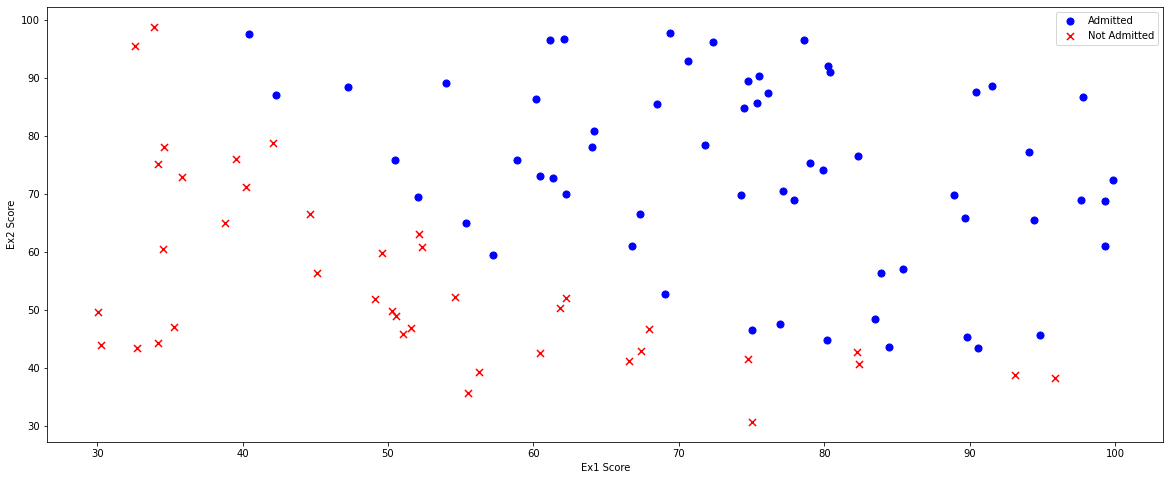

In [3]:
positive=data[data["Admitted"].isin([1])]
negative=data[data["Admitted"].isin([0])]

fig,ax=plt.subplots(figsize=(20,8))
ax.scatter(positive["Exam 1"],positive["Exam 2"],s=50,c='b',marker='o',label='Admitted')
ax.scatter(negative["Exam 1"],negative["Exam 2"],s=50,c='r',marker='x',label='Not Admitted')

ax.legend()
ax.set_xlabel('Ex1 Score')
ax.set_ylabel('Ex2 Score')
plt.show()

In [4]:
def sigmoid(z):
    return 1 / (1+ np.exp(-z))



In [5]:
def cost(theta,X,y):
    theta = np.matrix(theta)
    X=np.matrix(X)
    y=np.matrix(y)
    first = np.multiply(-y,np.log(sigmoid(X*theta.T)))
    scecond = np.multiply(1-y,np.log(1-sigmoid(X * theta.T)))
    return np.sum(first-scecond)/(len(X))

In [6]:
data.insert(0,'Ones',1)

In [7]:
print(data.head())

   Ones     Exam 1     Exam 2  Admitted
0     1  34.623660  78.024693         0
1     1  30.286711  43.894998         0
2     1  35.847409  72.902198         0
3     1  60.182599  86.308552         1
4     1  79.032736  75.344376         1


In [8]:
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]
theta = np.zeros(3)


In [9]:
X,y

(    Ones     Exam 1     Exam 2
 0      1  34.623660  78.024693
 1      1  30.286711  43.894998
 2      1  35.847409  72.902198
 3      1  60.182599  86.308552
 4      1  79.032736  75.344376
 ..   ...        ...        ...
 95     1  83.489163  48.380286
 96     1  42.261701  87.103851
 97     1  99.315009  68.775409
 98     1  55.340018  64.931938
 99     1  74.775893  89.529813
 
 [100 rows x 3 columns],
     Admitted
 0          0
 1          0
 2          0
 3          1
 4          1
 ..       ...
 95         1
 96         1
 97         1
 98         1
 99         1
 
 [100 rows x 1 columns])

In [10]:
X = np.array(X.values)
y = np.array(y.values)


In [11]:
X.shape,y.shape,theta.shape

((100, 3), (100, 1), (3,))

In [12]:
np.matrix(theta).T.shape

(3, 1)

In [13]:
np.matrix(theta).ravel().shape[1]

3

In [14]:
cost(theta,X,y)

0.6931471805599453

In [15]:
def gradient(theta,X,y):
    theta = np.matrix(theta)
    X = np.matrix(X)    
    y = np.matrix(y)
    

    #取theta的维度3,每次输入一个维度的样本
    parameters = int(theta.ravel().shape[1])

    grad = np.zeros(parameters)
    
    #误差
    error = sigmoid(X * theta.T) - y

    #每次输入X样本的一个维度
    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        # print(error.shape)
        # print(len(X))
        grad[i] = np.sum(term) / len(X)

    return grad

# grad = gradient(theta,X,y)
# print(grad)


In [16]:
import scipy.optimize as opt
result = opt.fmin_tnc(func=cost,x0=theta,fprime=gradient,args=(X,y))
#返回的是theta矩阵
result

(array([-25.16131863,   0.20623159,   0.20147149]), 36, 0)

In [17]:
print(result)

(array([-25.16131863,   0.20623159,   0.20147149]), 36, 0)


In [18]:
cost(result[0],X,y)

0.20349770158947458

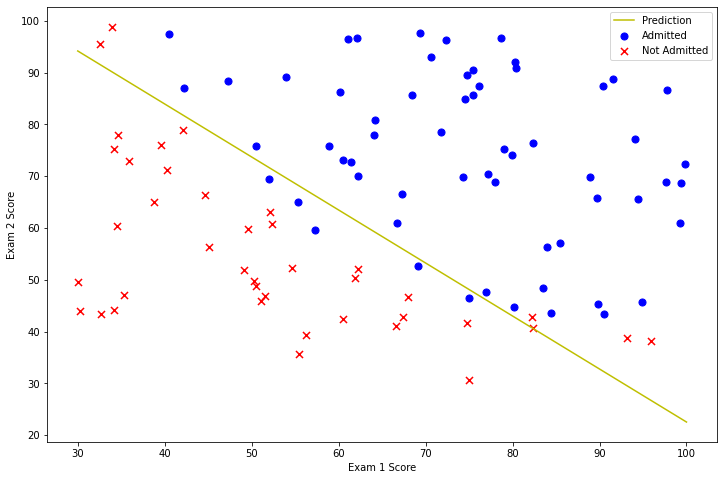

In [19]:
plotting_x1 = np.linspace(30, 100, 100)
plotting_h1 = ( - result[0][0] - result[0][1] * plotting_x1) / result[0][2]

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(plotting_x1, plotting_h1, 'y', label='Prediction')
ax.scatter(positive['Exam 1'], positive['Exam 2'], s=50, c='b', marker='o', label='Admitted')
ax.scatter(negative['Exam 1'], negative['Exam 2'], s=50, c='r', marker='x', label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')
plt.show()

In [20]:
def hfunc1(theta,X):
    return sigmoid(np.dot(theta.T,X))
hfunc1(result[0],[1,45,85])

0.7762906240463825

In [21]:
def predict(theta,X):
    probability = sigmoid(X*theta.T)
    return [1 if x >= 0.5 else 0 for x in probability]

In [22]:
theta_min = np.matrix(result[0])
predictions = predict(theta_min,X)
correct = [1 if ((a==1 and b==1) or (a==0 and b==0)) else 0 for (a,b) in  zip(predictions,y)]
accuracy = (sum(map(int,correct)) % len(correct))
print("accuracy = {0}%".format(accuracy))

accuracy = 89%


In [23]:
#第二部分
path = './ex2data2.txt'
data_init = pd.read_csv(path,header=None,names=['Test 1', 'Test 2', 'Accepted'])
data.head()

,Ones,Exam 1,Exam 2,Admitted
0,1,34.623660,78.024693,0
1,1,30.286711,43.894998,0
2,1,35.847409,72.902198,0
3,1,60.182599,86.308552,1
4,1,79.032736,75.344376,1


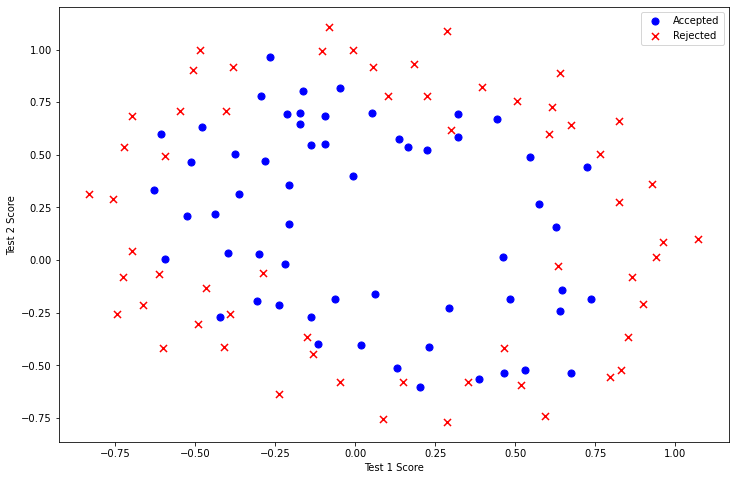

In [24]:
positive2 = data_init[data_init['Accepted'].isin([1])]
negative2 = data_init[data_init['Accepted'].isin([0])]

fig,ax = plt.subplots(figsize=(12,8))
ax.scatter(positive2['Test 1'], positive2['Test 2'], s=50, c='b', marker='o', label='Accepted')
ax.scatter(negative2['Test 1'], negative2['Test 2'], s=50, c='r', marker='x', label='Rejected')
ax.legend()
ax.set_xlabel('Test 1 Score')
ax.set_ylabel('Test 2 Score')
plt.show()

In [25]:
degree = 6
data2 = data_init
#原始的特征x1和x2
x1 = data2['Test 1']
x2 = data2['Test 2']
data


,Ones,Exam 1,Exam 2,Admitted
0,1,34.623660,78.024693,0
1,1,30.286711,43.894998,0
2,1,35.847409,72.902198,0
3,1,60.182599,86.308552,1
4,1,79.032736,75.344376,1
...,...,...,...,...
95,1,83.489163,48.380286,1
96,1,42.261701,87.103851,1
97,1,99.315009,68.775409,1
98,1,55.340018,64.931938,1


In [26]:
#特征映射feature-mapping
for i in range(1,degree+1):
    for j in range(0,i+1):
        data2['F' + str(i-j) + str(j)] = np.power(x1, i-j) * np.power(x2, j)
        
data2.drop('Test 1', axis=1, inplace=True)
data2.drop('Test 2', axis=1, inplace=True)
data2.head()

,Accepted,F10,F01,F20,F11,F02,F30,F21,F12,F03,...,F23,F14,F05,F60,F51,F42,F33,F24,F15,F06
0,1,0.051267,0.69956,0.002628,0.035864,0.489384,0.000135,0.001839,0.025089,0.342354,...,0.000900,0.012278,0.167542,1.815630e-08,2.477505e-07,0.000003,0.000046,0.000629,0.008589,0.117206
1,1,-0.092742,0.68494,0.008601,-0.063523,0.469143,-0.000798,0.005891,-0.043509,0.321335,...,0.002764,-0.020412,0.150752,6.362953e-07,-4.699318e-06,0.000035,-0.000256,0.001893,-0.013981,0.103256
2,1,-0.213710,0.69225,0.045672,-0.147941,0.479210,-0.009761,0.031616,-0.102412,0.331733,...,0.015151,-0.049077,0.158970,9.526844e-05,-3.085938e-04,0.001000,-0.003238,0.010488,-0.033973,0.110047
3,1,-0.375000,0.50219,0.140625,-0.188321,0.252195,-0.052734,0.070620,-0.094573,0.126650,...,0.017810,-0.023851,0.031940,2.780914e-03,-3.724126e-03,0.004987,-0.006679,0.008944,-0.011978,0.016040
4,1,-0.513250,0.46564,0.263426,-0.238990,0.216821,-0.135203,0.122661,-0.111283,0.100960,...,0.026596,-0.024128,0.021890,1.827990e-02,-1.658422e-02,0.015046,-0.013650,0.012384,-0.011235,0.010193


In [27]:
#定义代价函数，此处的learingrate为lambda
def costreg(theta,X,y,learningRate):
    X = np.matrix(X)
    y = np.matrix(y)
    theta = np.matrix(theta)
    
    first = np.multiply(-y,np.log(sigmoid(X*theta.T)))
    second = np.multiply((1-y),np.log(sigmoid(X * theta.T)))
    
    #正则化参数，len(X)为X的样本数量m，忽略theta0
    reg = (learningRate / (2 * len(X))) * np.sum(np.power(theta[:,1:theta.shape[1]], 2))
    return np.sum(first - second) / len(X) + reg

In [28]:
# 实现正则化的梯度函数
def gradientReg(theta, X, y, learningRate):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)
    
    error = sigmoid(X * theta.T) - y
    
    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        
        if (i == 0):
            grad[i] = np.sum(term) / len(X)
        else:
            grad[i] = (np.sum(term) / len(X)) + ((learningRate / len(X)) * theta[:,i])
    
    return grad

In [29]:
data.info

<bound method DataFrame.info of     Ones     Exam 1     Exam 2  Admitted
0      1  34.623660  78.024693         0
1      1  30.286711  43.894998         0
2      1  35.847409  72.902198         0
3      1  60.182599  86.308552         1
4      1  79.032736  75.344376         1
..   ...        ...        ...       ...
95     1  83.489163  48.380286         1
96     1  42.261701  87.103851         1
97     1  99.315009  68.775409         1
98     1  55.340018  64.931938         1
99     1  74.775893  89.529813         1

[100 rows x 4 columns]>

In [30]:
data2.shape

(118, 28)

In [31]:
cols = data2.shape[1]
X2 = data2.iloc[:,1:cols]
y2 = data2.iloc[:,0:1]
theta2 = np.zeros(cols - 1)


In [32]:
X2 = np.array(X2.values)
y2 = np.array(y2.values)



In [33]:
# λ设为1
learningRate = 1

In [34]:
# 计算初始代价
costreg(theta2, X2, y2, learningRate)

0.6931471805599454

In [35]:
import scipy.optimize as opt
result2 = opt.fmin_tnc(func=costreg, x0=theta2, fprime=gradientReg, args=(X2, y2, learningRate))
result2

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 54,
 4)

In [36]:
theta_min = np.matrix(result2[0])
predictions = predict(theta_min, X2)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y2)]
accuracy = (sum(map(int, correct)) % len(correct))
print ('accuracy = {0}%'.format(accuracy))

accuracy = 58%


In [37]:
def hfunc2(theta, x1, x2):
    temp = theta[0][0]
    place = 0
    for i in range(1, degree+1):
        for j in range(0, i+1):
            temp+= np.power(x1, i-j) * np.power(x2, j) * theta[0][place+1]
            place+=1
    return temp


In [38]:
def find_decision_boundary(theta):
    t1 = np.linspace(-1, 1.5, 1000)
    t2 = np.linspace(-1, 1.5, 1000)

    cordinates = [(x, y) for x in t1 for y in t2]
    x_cord, y_cord = zip(*cordinates)
    h_val = pd.DataFrame({'x1':x_cord, 'x2':y_cord})
    h_val['hval'] = hfunc2(theta, h_val['x1'], h_val['x2'])

    decision = h_val[np.abs(h_val['hval']) < 2 * 10**-3]
    return decision.x1, decision.x2

IndexError: index 27 is out of bounds for axis 0 with size 27

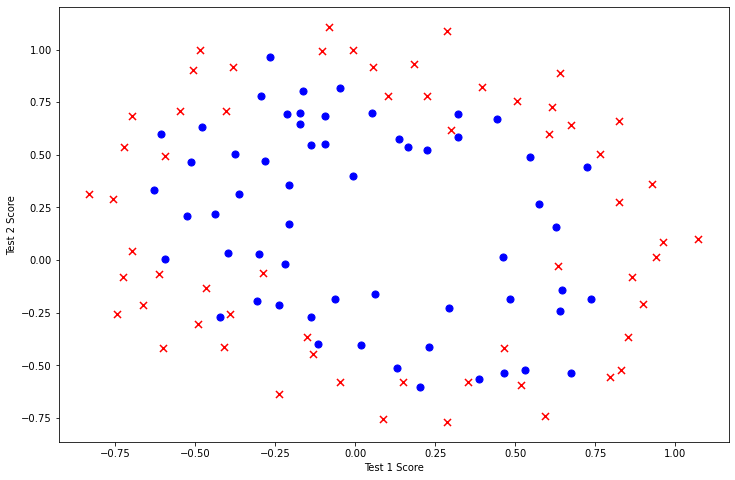

In [39]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive2['Test 1'], positive2['Test 2'], s=50, c='b', marker='o', label='Accepted')
ax.scatter(negative2['Test 1'], negative2['Test 2'], s=50, c='r', marker='x', label='Rejected')
ax.set_xlabel('Test 1 Score')
ax.set_ylabel('Test 2 Score')

x, y = find_decision_boundary(result2)
plt.scatter(x, y, c='y', s=10, label='Prediction')
ax.legend()
plt.show()